In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [6]:
titles.title.value_counts().head(10)

Hamlet                  19
Carmen                  14
Macbeth                 14
The Three Musketeers    12
Blood Money             11
The Outsider            11
Maya                    11
She                     11
Othello                 10
Honeymoon               10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [7]:
t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

1937    1185
1936    1127
1938    1115
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

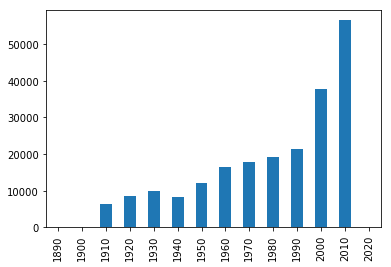

In [8]:
t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

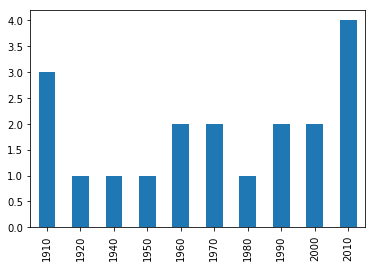

In [10]:
t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind = 'bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

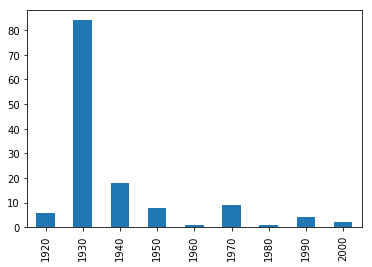

In [11]:
c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind = 'bar')

### Plot the number of "Hamlet" characters each decade.

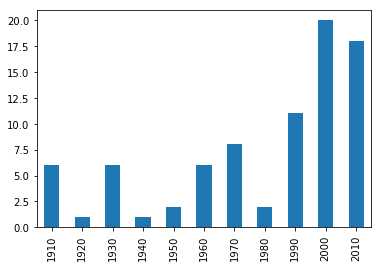

In [12]:
c = cast
c = c[c.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind = 'bar')

### What are the 11 most common character names in movie history?

In [13]:
cast.character.value_counts().head(11)

Himself        18926
Dancer         11015
Extra           8638
Reporter        7593
Doctor          6803
Policeman       6470
Student         6390
Nurse           6127
Bartender       6123
Minor Role      5830
Party Guest     5820
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [15]:
c = cast
c[c.character == 'Herself'].name.value_counts().head(10)


Joyce Brothers         14
Queen Elizabeth II     11
Margaret Thatcher       8
Mary Jo Pehl            7
Joan Rivers             7
Marilyn Monroe          5
Kareena Kapoor          5
Sally Jessy Raphael     5
Chris Evert             5
Juhi Chawla             5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [16]:
c = cast
c[c.character == 'Himself'].name.value_counts().head(10)


Adolf Hitler             93
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
George W. Bush           20
Franklin D. Roosevelt    20
Winston Churchill        20
Bill Clinton             20
Martin Luther King       19
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [18]:
cast[cast.year ==1945].name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     30
Harold Miller       28
Bess Flowers        28
Nolan Leary         27
Frank O'Connor      26
Franklyn Farnum     24
Charles Sullivan    24
Tom London          24
Edmund Cobb         24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [19]:
cast[cast.year ==1985].name.value_counts().head(10)

Shakti Kapoor       19
Mammootty           17
Sukumari            16
Lou Scheimer        15
Aruna Irani         14
Deven Verma         13
Mohanlal            13
Raj Babbar          13
Rajesh Khanna       13
Satyendra Kapoor    12
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

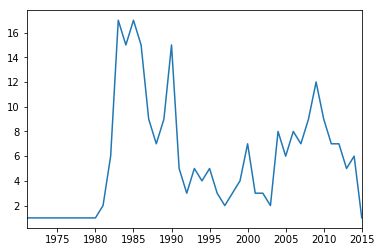

In [20]:
c[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [21]:
c = cast
c[c.character.str.startswith('Patron in')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Club                   3
Patron in cabaret                3
Patron in restaurant             3
Patron in Restaurant             3
Patron in Coffee Shop            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [22]:
c = cast
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         53
Science Student          8
Science Fair Student     8
Science Fair Judge       6
Science Club Member      5
Science Reporter         5
Science Promo Cadet      4
Science Kid              4
Science Officer          3
Science Fair Kid         3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

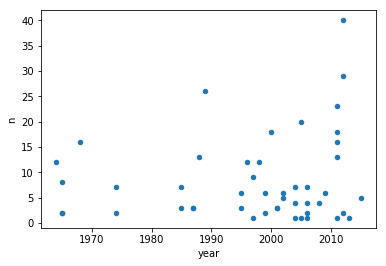

In [23]:
c = cast
c = c[c.name == 'Judi Dench'].sort_values(by=('year'))
c = c[c.n.notnull()]
c.plot(x = 'year', y = 'n', kind = 'scatter')

### Plot the n-values of Cary Grant's roles through his career.

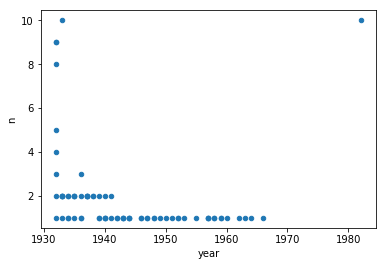

In [24]:
c = cast
c = c[c.name == 'Cary Grant'].sort_values(by=('year'))
c = c[c.n.notnull()]
c.plot(x = 'year', y = 'n', kind = 'scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

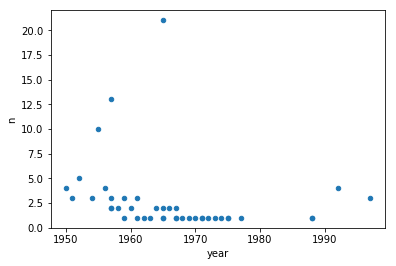

In [25]:
c = cast
c = c[c.name == 'Sidney Poitier'].sort_values(by=('year'))
c = c[c.n.notnull()]
c.plot(x = 'year', y = 'n', kind = 'scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [26]:
c = cast
c = c[c.year // 10 ==195]
c = c[c.n ==1]
c.type.value_counts()

actor      6375
actress    2813
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [27]:
c = cast
c = c[c.year // 10 ==195]
c = c[c.n ==2]
c.type.value_counts()

actress    4399
actor      4377
Name: type, dtype: int64